# Plotting Figure 1 and Figure 3
This script is to reproduce Figure 1 and Figure 3 from the ASPAI paper.
Please be aware that we used different models than in the ICASSP and JAP papers in order to demonstrate a specific behaviour of our approach compared to the ensemble based method.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

from pickle_utils import load_dict

snr_list = ["SNR_70", "SNR_60", "SNR_50", "SNR_40", "SNR_30", "SNR_20", "SNR_10", "SNR_0", "SNR_-10", "SNR_-20"]
snr_list.reverse()


def normalize(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))


def average(a, snr_list, length):
    avgs = np.zeros(len(snr_list,))
    for i in range(len(snr_list)):
        avgs[i] = np.mean(a[i*length:i*length+length])
            
    return avgs



def load_norm_avg(output_root):
    losses = load_dict(os.path.join(output_root, "mse_losses.pkl"))
    uncertainties = load_dict(os.path.join(output_root, "uncertainties_ens.pkl"))
    
    losses_avg = normalize(average(losses, snr_list, 1000))
    uncertainties_avg = normalize(average(uncertainties, snr_list, 1000))
    
    return losses_avg, uncertainties_avg
    
    
    
# load ensemble loss and uncertainty
output_root = Path(r'.\data\ASPAI\high_range\ensemble')
high_big_losses, high_big_uncertainties = load_norm_avg(output_root)

output_root = Path(r'.\data\ASPAI\full_range\ensemble')
full_big_losses, full_big_uncertainties = load_norm_avg(output_root)


def plot(high_big_losses, high_big_uncertainties, full_big_losses, full_big_uncertainties):
    SMALL_SIZE = 18
    MEDIUM_SIZE = 24
    BIGGER_SIZE = 32

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
    #plt.rc('legend', ncol=2)
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    params = {'legend.fontsize': SMALL_SIZE,
              'legend.handlelength': 2}
    plt.rcParams.update(params)

    xticklables = [entry.replace("SNR_", "") for entry in snr_list]
    fig, axes = plt.subplots(figsize=(12, 6), nrows=1, ncols=2)
    
    styles = ['cs-','bo--'] #  includes colors!
    #styles = ['ys--','yo-.','y^:','ro-','b^-'] #  inlcudes colors!

    idx = 0
    all_losses = np.vstack((high_big_losses, high_big_uncertainties)).T
    df = pd.DataFrame(all_losses, columns=['loss', 'ucrt_ens'])
    subax = df.plot(ax=axes[idx], style=styles, linewidth=2.0, ms=10, legend=True, title='', sharex=True)
    subax.set_xticks(range(df.shape[0]))
    subax.set_ylim((0, 1))
    subax.set_xticklabels(xticklables, rotation=0)
    subax.set_title("High Range")
    subax.set_ylabel("norm. loss/uncertainty")
    subax.set_xlabel('SNR [dB]')


    idx = 1
    all_losses = np.vstack((full_big_losses, full_big_uncertainties)).T
    df = pd.DataFrame(all_losses, columns=['loss', 'ucrt_ens'])
    subax = df.plot(ax=axes[idx], style=styles, linewidth=2.0, ms=10, legend=False, title='', sharex=True)
    subax.set_xticks(range(df.shape[0]))
    subax.set_ylim((0, 1))
    subax.set_xticklabels(xticklables, rotation=0)
    subax.set_title("Full Range")
    #subax.set_ylabel("loss/uncertainty")
    subax.set_xlabel('SNR [dB]')


    plt.tight_layout()
    plt.savefig("ensemble_fail.png", dpi=fig.dpi)
    plt.show()


In [2]:
def plot_results(high_big_losses, high_big_uncertainties1, high_big_uncertainties2, full_big_losses, full_big_uncertainties1, full_big_uncertainties2):
    SMALL_SIZE = 18
    MEDIUM_SIZE = 24
    BIGGER_SIZE = 32

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
    #plt.rc('legend', ncol=2)
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    params = {'legend.fontsize': SMALL_SIZE,
              'legend.handlelength': 2}
    plt.rcParams.update(params)

    xticklables = [entry.replace("SNR_", "") for entry in snr_list]
    fig, axes = plt.subplots(figsize=(12, 6), nrows=1, ncols=2)
    
    styles = ['cs-', 'ro--', 'b^:'] #  includes colors!
    #styles = ['ys--','yo-.','y^:','ro-','b^-'] #  inlcudes colors!

    idx = 0
    all_losses = np.vstack((high_big_losses, high_big_uncertainties1, high_big_uncertainties2)).T
    df = pd.DataFrame(all_losses, columns=['loss', 'ucrt_1', 'ucrt_2'])
    subax = df.plot(ax=axes[idx], style=styles, linewidth=2.0, ms=10, legend=True, title='', sharex=True)
    subax.set_xticks(range(df.shape[0]))
    subax.set_ylim((0, 1))
    subax.set_xticklabels(xticklables, rotation=0)
    subax.set_title("High Range")
    subax.set_ylabel("norm. loss/uncertainty")
    subax.set_xlabel('SNR [dB]')


    idx = 1
    all_losses = np.vstack((full_big_losses, full_big_uncertainties1, full_big_uncertainties2)).T
    df = pd.DataFrame(all_losses, columns=['loss', 'ucrt_1', 'ucrt_2'])
    subax = df.plot(ax=axes[idx], style=styles, linewidth=2.0, ms=10, legend=False, title='', sharex=True)
    subax.set_xticks(range(df.shape[0]))
    subax.set_ylim((0, 1))
    subax.set_xticklabels(xticklables, rotation=0)
    subax.set_title("Full Range")
    #subax.set_ylabel("loss/uncertainty")
    subax.set_xlabel('SNR [dB]')


    plt.tight_layout()
#    plt.savefig("uncertainties_vs_loss.png", dpi=fig.dpi)
    plt.show()


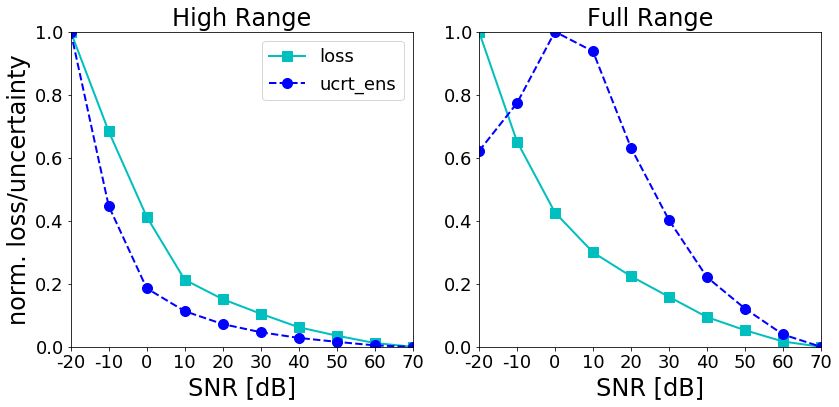

In [3]:
plot(high_big_losses, high_big_uncertainties, full_big_losses, full_big_uncertainties)

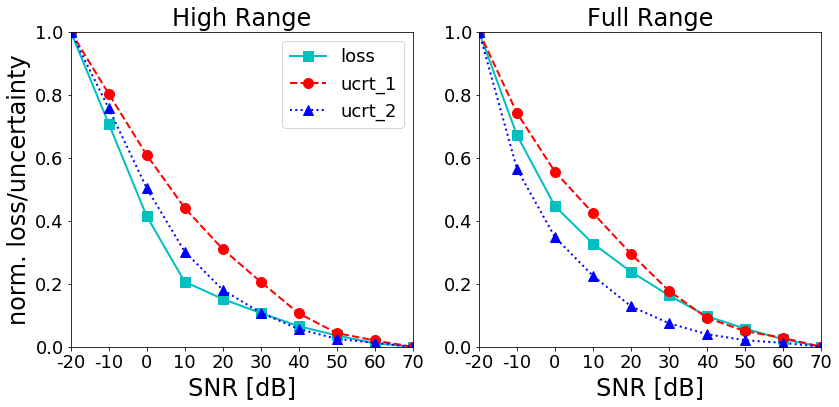

In [4]:
def load_all_metrics(output_path):
    mse_losses = load_dict(os.path.join(output_path, "mse_losses.pkl"))

    uncertainties_org = load_dict(os.path.join(output_path, "uncertainties_org.pkl"))
    uncertainties_area = load_dict(os.path.join(output_path, "uncertainties_area.pkl"))
    
    return mse_losses, uncertainties_org, uncertainties_area

def average_snr(a, snr_list):
    avgs = np.zeros(len(snr_list,))
    for i in range(len(snr_list)):
        avgs[i] = np.mean(a[snr_list[i]])
            
    return [avgs]

def load_norm_avg_results(output_path, snr_list):
    mse_losses, uncertainties_org, uncertainties_area = load_all_metrics(output_path)
    
    mse_losses_avg = normalize(average_snr(mse_losses, snr_list))
    uncertainties_org_avg = normalize(average_snr(uncertainties_org, snr_list))
    uncertainties_area_avg = normalize(average_snr(uncertainties_area, snr_list))

    return [mse_losses_avg, uncertainties_org_avg, uncertainties_area_avg]


    
    
# load ensemble loss and uncertainty
output_root = Path(r'.\data\ASPAI\high_range\single_model')
high_big_losses, high_big_uncertainties1, high_big_uncertainties2 = load_norm_avg_results(output_root, snr_list)

output_root = Path(r'.\data\ASPAI\full_range\single_model')
full_big_losses, full_big_uncertainties1, full_big_uncertainties2 = load_norm_avg_results(output_root, snr_list)

plot_results(high_big_losses, high_big_uncertainties1, high_big_uncertainties2, full_big_losses, full_big_uncertainties1, full_big_uncertainties2)